C:\Users\Miriam Martinez\AppData\Local\Temp\ipykernel_6076\3067997520.py:78: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfw = pd.read_sql(sql, conn,
C:\Users\Miriam Martinez\AppData\Local\Temp\ipykernel_6076\3067997520.py:78: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfw = pd.read_sql(sql, conn,
C:\Users\Miriam Martinez\AppData\Local\Temp\ipykernel_6076\3067997520.py:78: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfw = pd.read_sql(sql, conn,
C:\Users\Miriam Martinez\AppData\Local\Temp\ipykernel_6076\3067997520.py:

Comparativa Semanal Resumida:


Guardado en C:\Users\Miriam Martinez\OneDrive - Natgas\Planeación comercial\ANÁLISIS\GNC\comparativa_semanal_resumida.xlsx


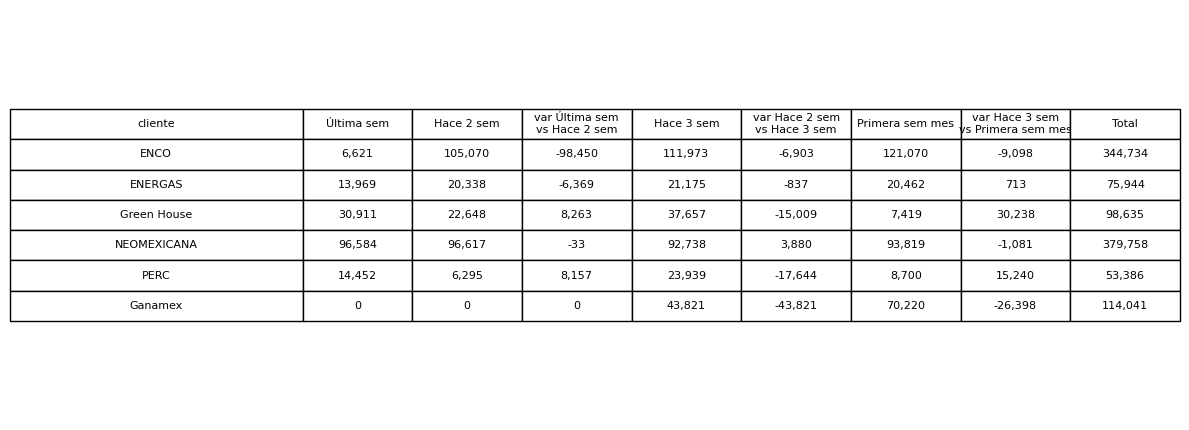

Tabla comparativa guardada en: comparativa_semanal_imagen.png


C:\Users\Miriam Martinez\AppData\Local\Temp\ipykernel_6076\3067997520.py:159: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_full = pd.read_sql(sql_full, conn, params=(PLACAS, start, end))
c:\Users\Miriam Martinez\anaconda3\envs\inesdi\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Miriam Martinez\anaconda3\envs\inesdi\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Miriam Martinez\anaconda3\envs\inesdi\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Miriam Martinez\anaconda3\envs\inesdi\Lib\site-packages

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import psycopg2

# --- Conexión ---
def get_conn():
    return psycopg2.connect(
        dbname="postgres", user="erelis_admin", password="WQyS2HkgE7jRSi",
        host="erelis-prod.postgres.database.azure.com", port=5432
    )

# --- Tu mapeo de placa a cliente ---
CLIENTE_MAP = {
    '51UD2U':'NEOMEXICANA DE GNC SA PI DE CV', '54US8S':'COMERCIAL Y TRANSPORTE GNC',
    '57UG7X':'NEOMEXICANA DE GNC SA PI DE CV','60UG7X':'NEOMEXICANA DE GNC SA PI DE CV',
    'GENDISTA':'DISTASERMEX','GENENCO':'ENCO','GENSIMSA':'ENERGAS DE MEXICO',
    'NEOMEXICANA':'NEOMEXICANA DE GNC SA PI DE CV','E5773':'Contenedor de GNC NATGAS',
    'E6713':'Contenedor de GNC NATGAS','7HU2382':'Contenedor de GNC NATGAS','E5772':'Contenedor de GNC NATGAS',
    'E6712':'Contenedor de GNC NATGAS','E5771':'Contenedor de GNC NATGAS','GENCIMAGAS':'CIMAGAS',
    '55AX8N':'COMERCIAL Y TRANSPORTE GNC','537XT1':'ENERGAS DE MEXICO','GENSIMA':'CIMAGAS',
    '08UH8N':'NEOMEXICANA DE GNC SA PI DE CV','80UH8N':'NEOMEXICANA DE GNC SA PI DE CV',
    '03AN2H':'GAS NATURAL URUAPAN','80UH8P':'NEOMEXICANA DE GNC SA PI DE CV','70UD2S':'NEOMEXICANA DE GNC SA PI DE CV',
    'GEMSIMSA':'ENERGAS DE MEXICO','GSIMSA':'ENERGAS DE MEXICO','97UH6P':'NEOMEXICANA DE GNC SA PI DE CV',
    '17UJ4J':'NEOMEXICANA DE GNC SA PI DE CV','18AU6X':'NEOMEXICANA DE GNC SA PI DE CV','18UG6X':'NEOMEXICANA DE GNC SA PI DE CV',
    '7HU7608':'Contenedor de GNC NATGAS','7HU7607':'Contenedor de GNC NATGAS','07UC7G':'COMERCIAL Y TRANSPORTE GNC',
    '80UH8':'NEOMEXICANA DE GNC SA PI DE CV','86UR6H':'NEOMEXICANA DE GNC SA PI DE CV','02UR6M':'Ganamex',
    '02UC3X':'Ganamex','03UR6M':'Ganamex','51UR8M':'Ganamex','551XA4':'NEOMEXICANA DE GNC SA PI DE CV',
    '555XA4':'Ganamex','71HU7C':'COMERCIAL Y TRANSPORTE GNC','71UH7C':'COMERCIAL Y TRANSPORTE GNC',
    '0711UC7G':'COMERCIAL Y TRANSPORTE GNC','07UC76':'COMERCIAL Y TRANSPORTE GNC','71UH7':'COMERCIAL Y TRANSPORTE GNC',
    'GENGREEN':'Green House','35UD1K':'COMERCIAL Y TRANSPORTE GNC','550XA4':'COMERCIAL Y TRANSPORTE GNC',
    '551XA':'COMERCIAL Y TRANSPORTE GNC','8HU6323':'Contenedor de GNC NATGAS','04UR6M':'Ganamex',
    '63UW1H':'Ganamex','65UW1H':'Ganamex','78UP7G':'Ganamex','79UP7G':'Ganamex',
    '80UP7G':'Ganamex','81UP7G':'Ganamex','98UC2X':'Ganamex'

}

# Luego, sobreescribe en bloque esos dos valores:
for placa, cliente in CLIENTE_MAP.items():
    if cliente == 'NEOMEXICANA DE GNC SA PI DE CV':
        CLIENTE_MAP[placa] = 'NEOMEXICANA'
    elif cliente == 'COMERCIAL Y TRANSPORTE GNC':
        CLIENTE_MAP[placa] = 'PERC'
    elif cliente == 'ENERGAS DE MEXICO':
        CLIENTE_MAP[placa] = 'ENERGAS'

PLACAS = list(CLIENTE_MAP.keys())

# --- Fechas semanales ---
hoy = datetime(2025,6,23).date()
ultimo_dom = hoy - timedelta(days=(hoy.weekday()+1)%7)
ultimo_lun = ultimo_dom - timedelta(days=6)
ant_inicio = datetime(2025,6,1).date()
ant_fin    = ultimo_lun - timedelta(days=1)

def consumo_variaciones_semanales(n_semanas=4):
    today = datetime.now().date()
    last_sunday = today - timedelta(days=(today.weekday()+1)%7)
    ranges = []
    end = last_sunday
    for _ in range(n_semanas):
        start = end - timedelta(days=6)
        ranges.append((start, end))
        end = start - timedelta(days=1)

    sql = """
      SELECT placa, SUM(cantidad) AS litros
      FROM erelis2_ventas_total
      WHERE fecha >= %s
        AND fecha <  %s
        AND placa = ANY(%s)
      GROUP BY placa
    """
    semana_series = []
    with get_conn() as conn:
        for start, end in ranges:
            dfw = pd.read_sql(sql, conn,
                              params=(start, end + timedelta(days=1), PLACAS))
            dfw['cliente'] = dfw['placa'].map(CLIENTE_MAP)
            serie = dfw.groupby('cliente')['litros'].sum()
            semana_series.append(serie)

    # Armar DataFrame con consumos por semana
    df_weeks = pd.concat(semana_series, axis=1).fillna(0)
    labels = ["Última sem","Hace 2 sem","Hace 3 sem","Primera sem mes"]
    df_weeks.columns = labels
    df_weeks = df_weeks.drop(index="Contenedor de GNC NATGAS", errors='ignore')

    # Calcular variaciones con salto de línea en el encabezado
    for i in range(1, len(labels)):
        curr, prev = labels[i-1], labels[i]
        df_weeks[f"var {curr}\nvs {prev}"] = df_weeks[curr] - df_weeks[prev]

    # Total de litros por cliente
    df_weeks['Total'] = df_weeks[labels].sum(axis=1)

    # Reordenar columnas usando las mismas cadenas con '\n'
    ordered = []
    for i, lbl in enumerate(labels):
        ordered.append(lbl)
        if i > 0:
            ordered.append(f"var {labels[i-1]}\nvs {lbl}")
    ordered.append("Total")

    # Formatear y retornar
    df_final = df_weeks[ordered].applymap(lambda x: f"{int(round(x)):,}")
    return df_final


df_var = consumo_variaciones_semanales(4)
print("Comparativa Semanal Resumida:\n")
#print(df_var.to_string())

# guardar a Excel
ruta = r"C:\Users\Miriam Martinez\OneDrive - Natgas\Planeación comercial\ANÁLISIS\GNC\comparativa_semanal_resumida.xlsx"
df_var.to_excel(ruta)
print(f"\nGuardado en {ruta}")

# Asegúrate de tener `df_var` (el DataFrame formateado con strings de miles)
df_fmt = df_var  # si ya está formateado, úsalo directamente

fig, ax = plt.subplots(figsize=(12, 2 + 0.4 * len(df_fmt)))
ax.axis('off')

# Prepara los datos
table_data = df_fmt.reset_index()
col_labels = table_data.columns.tolist()
cell_text = table_data.values.tolist()

tbl = ax.table(cellText=cell_text, colLabels=col_labels,
               loc='center', cellLoc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(8)

# Ajusta anchos de columna
ncols = len(col_labels)
col_widths = [0.25] + [0.75/(ncols-1)]*(ncols-1)
for col, width in enumerate(col_widths):
    for row in range(len(table_data)+1):
        tbl[(row, col)].set_width(width)

tbl.scale(1,1.5)
plt.tight_layout()
plt.savefig('comparativa_semanal_imagen.png', dpi=150)
plt.show()

print("Tabla comparativa guardada en: comparativa_semanal_imagen.png")

# --- Tendencia mensual + forecast incluyendo C. Transporte GNC ---
start = datetime(2025,1,1)
end   = datetime(2025,6,23)+timedelta(days=1)
sql_full = """
  SELECT placa,cantidad,fecha
  FROM erelis2_ventas_total
  WHERE placa=ANY(%s) AND fecha>= %s AND fecha< %s
"""
with get_conn() as conn:
    df_full = pd.read_sql(sql_full, conn, params=(PLACAS, start, end))

df_full['fecha'] = pd.to_datetime(df_full['fecha'])
df_full['cliente'] = df_full['placa'].map(CLIENTE_MAP)
df_full['mes'] = df_full['fecha'].dt.to_period('M')
df_full['dias_mes'] = df_full['fecha'].dt.daysinmonth
df_full['lit_norm'] = df_full['cantidad']/df_full['dias_mes']*30

monthly = df_full.groupby(['cliente','mes'])['lit_norm'].sum().reset_index()
pivot = monthly.pivot(index='mes',columns='cliente',values='lit_norm').fillna(0)
# quitar Contenedor
pivot = pivot.drop(columns=["Contenedor de GNC NATGAS"], errors='ignore')

# lista fija de clientes a graficar
clients = ["PERC","ENCO","NEOMEXICANA","ENERGAS","Ganamex", "Green House"]

forecasts = {}
for cli in clients:
    ser = pivot[cli]
    try:
        fit = ExponentialSmoothing(ser,trend='add').fit()
        forecasts[cli]=fit.forecast(1).iloc[0]
    except:
        forecasts[cli]=None




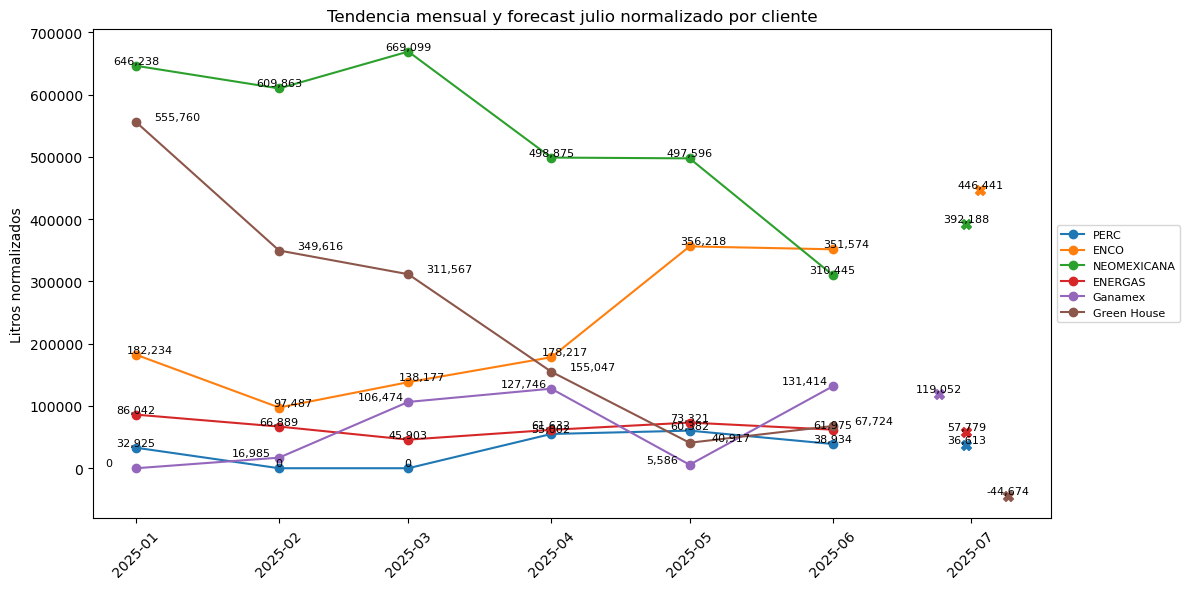

In [6]:
# (Asume que 'pivot' y 'forecasts' ya están calculados como antes)

from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.dates as mdates   

# (… tu código para pivot y forecasts …)

plt.figure(figsize=(12,6))
dates = pivot.index.to_timestamp()

jitter_days = {
    "COMERCIAL Y TRANSPORTE GNC": -3,
    "ENCO": +3,
    "NEOMEXICANA DE GNC SA PI DE CV": 0,
    "ENERGAS DE MEXICO": +6,
    "Ganamex": -6,
    "Green House": +9
}

for cli in clients:
    vals = pivot[cli]
    plt.plot(dates, vals, marker='o', linestyle='-', label=cli)
    for x, y in zip(dates, vals):
        x_j = x + pd.Timedelta(days=jitter_days.get(cli, 0))
        plt.text(x_j, y, f"{y:,.0f}", ha='center', va='bottom', fontsize=8)

next_date = dates[-1] + pd.offsets.MonthEnd(1)
for cli in clients:
    fx = forecasts.get(cli)
    if fx is not None:
        x_j = next_date + pd.Timedelta(days=jitter_days.get(cli, 0))
        plt.scatter([x_j], [fx], marker='X', s=50)
        plt.text(x_j, fx, f"{fx:,.0f}", ha='center', va='bottom', fontsize=8)

# ahora sí podemos formatear el eje X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xticks(rotation=45)

plt.legend(loc='center left', bbox_to_anchor=(1,0.5), fontsize=8)
plt.title('Tendencia mensual y forecast julio normalizado por cliente')
plt.ylabel("Litros normalizados")
plt.tight_layout()
plt.savefig('trend_forecast_separated.png', dpi=150)
plt.show()

In [4]:
import matplotlib.pyplot as plt
import textwrap


# --- Asume que justo aquí ya tienes tu df_tab calculado, con todo el histórico y forecast ---
# df_tab = ...  (tu DataFrame original, index=mes, columnas=clientes, valores lit_norm y forecast)

# Formatear los números con separador de miles
df_fmt = df_tab.applymap(lambda x: f"{int(round(x)):,}")

# Crear la figura y el eje
fig, ax = plt.subplots(
    figsize=(len(df_fmt.columns) * 1.2 + 2, len(df_fmt) * 0.4 + 2)
)
ax.axis('off')

# Preparar datos para la tabla
table_data = df_fmt.reset_index()
col_labels = table_data.columns.tolist()
cell_text = table_data.values.tolist()
# 1) Envolver cada etiqueta a un ancho máximo de, digamos, 12 caracteres:
wrapped_labels = [textwrap.fill(lbl, width=12) for lbl in col_labels]

# Crear la tabla con anchos de columna personalizados
tbl = ax.table(
    cellText=cell_text,
    colLabels=col_labels,
    loc='center',
    cellLoc='center'
)

# Ajustar el tamaño de fuente
tbl.auto_set_font_size(False)
tbl.set_fontsize(8)

# Dar más ancho a la primera columna (etiquetas de cliente)
ncols = len(col_labels)
col_widths = [0.3] + [0.7 / (ncols - 1)] * (ncols - 1)
for col, width in enumerate(col_widths):
    for row in range(len(table_data) + 1):  # +1 para la fila de encabezados
        tbl[(row, col)].set_width(width)

# Escalar altura de filas
tbl.scale(1, 1.5)

plt.tight_layout()
plt.savefig('tabla_trend_forecast_completa.png', dpi=150)
plt.show()
print("Tabla completa guardada en: tabla_trend_forecast_completa.png")


NameError: name 'df_tab' is not defined

C:\Users\Miriam Martinez\AppData\Local\Temp\ipykernel_6076\1153675839.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_full = pd.read_sql(sql_historico, conn, params=(PLACAS, start, end))
C:\Users\Miriam Martinez\AppData\Local\Temp\ipykernel_6076\1153675839.py:34: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_id = pd.read_sql(
C:\Users\Miriam Martinez\AppData\Local\Temp\ipykernel_6076\1153675839.py:48: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_full = pd.read_sql(
C:\Users\Miriam Martinez\AppData\Local\Temp\

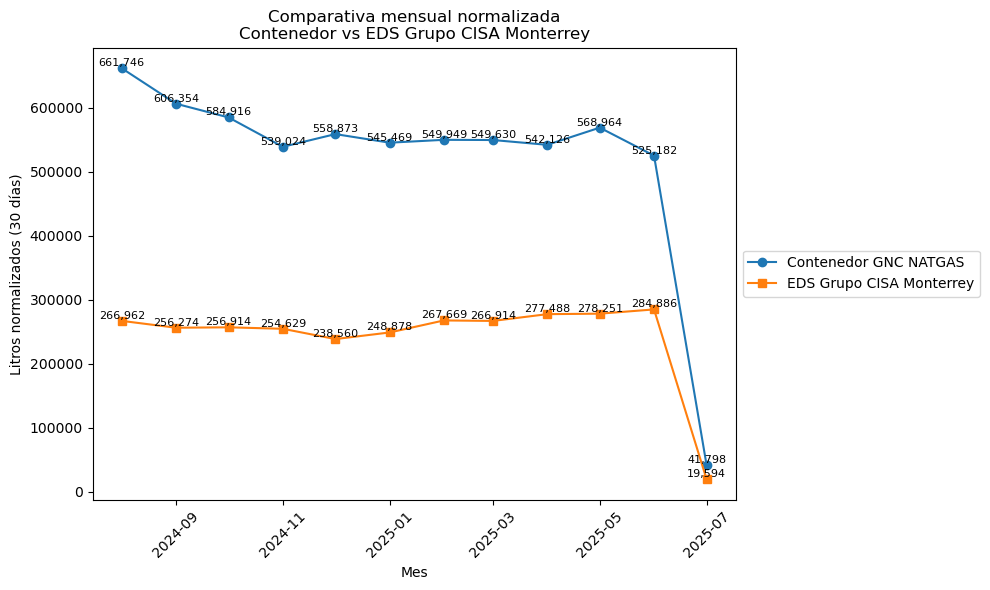

In [7]:
# --- Lectura de TODO el histórico de ventas para NUESTRO pivot mensual ---
start = datetime(2024, 8, 1)
end   = datetime.now() + pd.Timedelta(days=1)
sql_historico = """
    SELECT placa, cantidad, fecha
      FROM erelis2_ventas_total
     WHERE placa = ANY(%s)
       AND fecha >= %s
       AND fecha <  %s
"""
with get_conn() as conn:
    df_full = pd.read_sql(sql_historico, conn, params=(PLACAS, start, end))

# normalizamos litros a 30 días
df_full['fecha'] = pd.to_datetime(df_full['fecha'])
df_full['mes']    = df_full['fecha'].dt.to_period('M')
df_full['dias_mes'] = df_full['fecha'].dt.daysinmonth
df_full['lit_norm'] = df_full['cantidad'] / df_full['dias_mes'] * 30

# pivot de clientes
df_full['cliente'] = df_full['placa'].map(CLIENTE_MAP)
monthly = (
    df_full
    .groupby(['cliente','mes'])['lit_norm']
    .sum()
    .reset_index()
)
pivot = monthly.pivot(index='mes', columns='cliente', values='lit_norm').fillna(0)
# extraigo la serie de "Contenedor de GNC NATGAS"
serie_container = pivot['Contenedor de GNC NATGAS']

# 1) Primero obtén el id de la EDS “GRUPO CISA MONTERREY”
with get_conn() as conn:
    df_id = pd.read_sql(
        "SELECT id_eds FROM erelis2_cat_eds WHERE desc_oasis = %s",
        conn, params=("GRUPO CISA MONTERREY",)
    )
    if df_id.empty:
        raise ValueError("No se encontró 'GRUPO CISA MONTERREY' en el catálogo de EDS")
    id_cisa = int(df_id.at[0, "id_eds"])

# 2) Recupera todo el histórico normalizado de tu Contenedor y de CISA
start = datetime(2024, 8, 1)
end   = datetime.now() + pd.Timedelta(days=1)

# a) Ventas de placas GNC (para tu pivot ya creado antes)
with get_conn() as conn:
    df_full = pd.read_sql(
        """
        SELECT placa, cantidad, fecha
        FROM erelis2_ventas_total
        WHERE placa = ANY(%s)
          AND fecha >= %s AND fecha < %s
        """,
        conn, params=(PLACAS, start, end)
    )

df_full['fecha']    = pd.to_datetime(df_full['fecha'])
df_full['mes']      = df_full['fecha'].dt.to_period('M')
df_full['dias_mes'] = df_full['fecha'].dt.daysinmonth
df_full['lit_norm'] = df_full['cantidad'] / df_full['dias_mes'] * 30
df_full['cliente']  = df_full['placa'].map(CLIENTE_MAP)

pivot = (
    df_full
    .groupby(['mes','cliente'])['lit_norm']
    .sum()
    .unstack(fill_value=0)
)

serie_container = pivot["Contenedor de GNC NATGAS"]

# b) Ventas de la EDS CISA
with get_conn() as conn:
    df_cisa = pd.read_sql(
        """
        SELECT cantidad, fecha
        FROM erelis2_ventas_total
        WHERE erelis2_id_eds = %s
          AND fecha >= %s AND fecha < %s
        """,
        conn, params=(id_cisa, start, end)
    )

df_cisa['fecha']    = pd.to_datetime(df_cisa['fecha'])
df_cisa['mes']      = df_cisa['fecha'].dt.to_period('M')
df_cisa['dias_mes'] = df_cisa['fecha'].dt.daysinmonth
df_cisa['lit_norm'] = df_cisa['cantidad'] / df_cisa['dias_mes'] * 30

serie_cisa = (
    df_cisa
    .groupby('mes')['lit_norm']
    .sum()
    .reindex(pivot.index, fill_value=0)
)

# 3) Graficar comparativa
x = pivot.index.to_timestamp()

plt.figure(figsize=(10,6))
plt.plot(x, serie_container, marker='o', label='Contenedor GNC NATGAS')
plt.plot(x, serie_cisa,      marker='s', label='EDS Grupo CISA Monterrey')

for xi, y in zip(x, serie_container):
    plt.text(xi, y, f"{y:,.0f}", ha='center', va='bottom', fontsize=8)
for xi, y in zip(x, serie_cisa):
    plt.text(xi, y, f"{y:,.0f}", ha='center', va='bottom', fontsize=8)

plt.title('Comparativa mensual normalizada\nContenedor vs EDS Grupo CISA Monterrey')
plt.xlabel('Mes')
plt.ylabel('Litros normalizados (30 días)')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.tight_layout()
plt.savefig('comparativa_container_vs_cisa.png', dpi=150)
plt.show()

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Supongamos que ya tienes el DataFrame 'mensual' con índice PeriodIndex
# y columnas renombradas: ["PERC","ENCO","Neomexicana","ENERGAS","Ganamex","Green House"]


C:\Users\Miriam Martinez\AppData\Local\Temp\ipykernel_6076\4103413897.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_full = pd.read_sql(sql_full, conn, params=(PLACAS,))


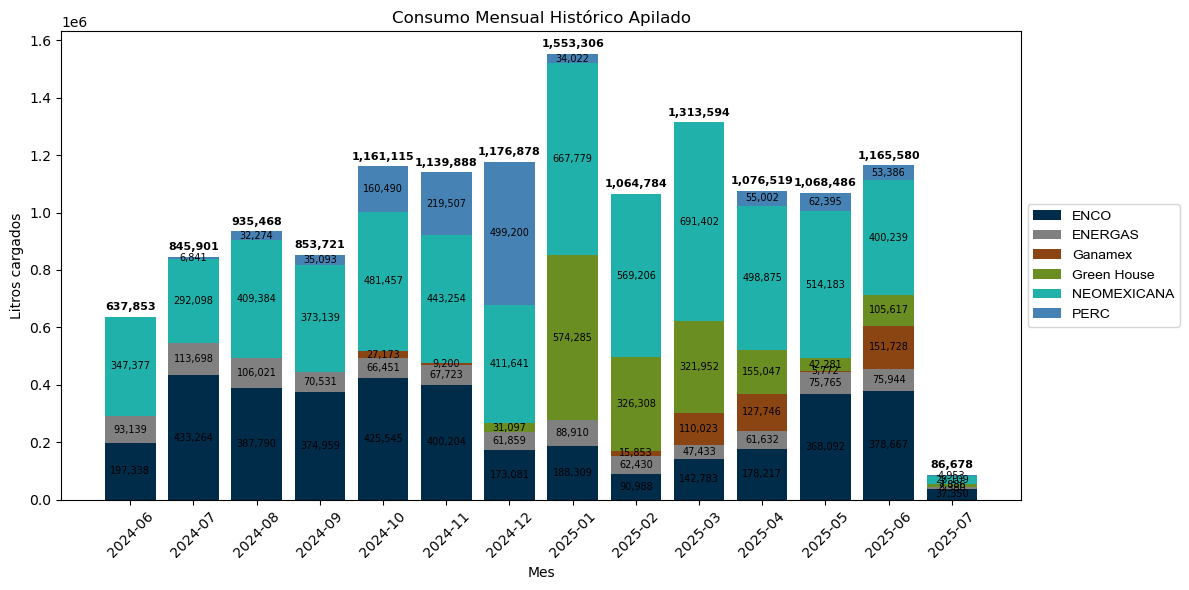

In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1) Carga de datos y mapeo (asegúrate de tener CLIENTE_MAP y PLACAS definidos)
conn = psycopg2.connect(
    dbname="postgres",
    user="erelis_admin",
    password="WQyS2HkgE7jRSi",
    host="erelis-prod.postgres.database.azure.com",
    port=5432
)
sql_full = """
  SELECT placa, fecha, cantidad
  FROM erelis2_ventas_total
  WHERE placa = ANY(%s)
"""
df_full = pd.read_sql(sql_full, conn, params=(PLACAS,))
conn.close()

df_full['cliente'] = df_full['placa'].map(CLIENTE_MAP)

# 2) Preparar periodo mensual
df_full['fecha'] = pd.to_datetime(df_full['fecha'])
df_full['mes']   = df_full['fecha'].dt.to_period('M')

# 3) Filtrar clientes principales y agrupar
clients = ["PERC", "ENCO", "NEOMEXICANA", "ENERGAS", "Ganamex", "Green House"]
df_princ = df_full[df_full['cliente'].isin(clients)]
mensual = (
    df_princ
    .groupby(['mes', 'cliente'])['cantidad']
    .sum()
    .unstack(fill_value=0)
)

# 4) Reindexar desde junio 2024 hasta último mes disponible
primer_mes = pd.Period("2024-06", freq="M")
ultimo_mes = mensual.index.max()
todos_meses = pd.period_range(primer_mes, ultimo_mes, freq="M")

# 2) Reindexar para incluir meses con 0 consumo
mensual_completo = mensual.reindex(todos_meses, fill_value=0)

# 5) Convertir PeriodIndex a fechas para graficar
dates = mensual_completo.index.to_timestamp()

# 2) Prepara posiciones y etiquetas
labels = mensual_completo.index.strftime("%Y-%m")
x      = np.arange(len(labels))

# 3) Colores sin rojo ni morado
colors = [ "#002B49","#808080","#8B4513", "#6B8E23", "#20B2AA", "#4682B4", "#A0982D"]

# 4) Dibuja el stacked bar y etiqueta cada segmento
fig, ax = plt.subplots(figsize=(12, 6))
bottom = np.zeros(len(x))

for idx, cli in enumerate(mensual_completo.columns):
    vals = mensual_completo[cli].values
    bars = ax.bar(x, vals, width=0.8, bottom=bottom, color=colors[idx], label=cli)
    # Etiqueta dentro de cada segmento
    for xi, yi, bi in zip(x, vals, bottom):
        if yi > 0:
            ax.text(xi, bi + yi/2, f"{yi:,.0f}", ha='center', va='center', fontsize=7)
    bottom += vals

# 5) Etiqueta total sobre cada barra
for xi, tot in zip(x, bottom):
    ax.text(xi, tot + max(bottom)*0.01, f"{int(tot):,}", ha='center', va='bottom', 
            fontsize=8, fontweight='bold')

# 6) Formato de ejes
# forzar Arial en todos los textos de Matplotlib
matplotlib.rcParams['font.family'] = 'Arial'
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.set_xlabel("Mes")
ax.set_ylabel("Litros cargados")
ax.set_title(f"Consumo Mensual Histórico Apilado")
ax.legend(loc='center left', bbox_to_anchor=(1,0.5))

plt.tight_layout()
plt.show()
